<a href="https://colab.research.google.com/github/Chethan-AI/code_forecasting/blob/main/OCR_BankCheuque__text_extraction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install tesseract.OCR
!apt install libetesseract.dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'tesseract-ocr-chi-tra-vert' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-laoo' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-latn' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-chi-sim-vert' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-frak' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-cyrl' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-sinh' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-hang' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-hans' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-hant' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-hant-vert' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-script-jpan-vert' for regex 'tesseract.OCR'
Note, selecting 'tesseract-ocr-lang' for regex 'tess

In [ ]:
!pip install pytesseract

     |████████████████████████████████| 4.3 MB 44.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pytesseract
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import datetime

In [ ]:
!ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

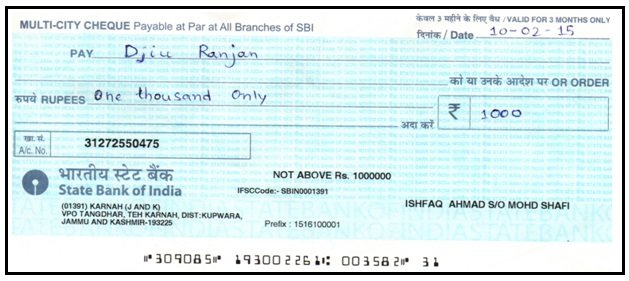

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Sample-image-of-a-bank-cheque.jpg')
image1 = Image.open('/content/drive/MyDrive/Colab Notebooks/Screenshot_20220418-115629_Chrome.jpg')
image

In [ ]:
im = Image.open('/content/drive/MyDrive/Colab Notebooks/Sample-image-of-a-bank-cheque.jpg',  'r')
pix_val = list(im.getdata())
pix_val_flat = [x for sets in pix_val for x in sets]
# pix_val_flat

In [ ]:
# fetching the dimensions
wid, hgt = image.size
  
# displaying the dimensions
print(str(wid) + "x" + str(hgt))

629x281


In [ ]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2022-05-05 08:25:10--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.003s  

2022-05-05 08:25:10 (41.9 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [ ]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [ ]:
check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
micr_img = check_img[205:281, 2:629]
check_img.shape

(281, 629, 3)

In [ ]:
# import os
# path = "/content/drive/MyDrive/Colab Notebooks/Sample-image-of-a-bank-cheque.jpg"
# if os.path.exists(path):
#    img = cv2.imread(path) 
# else:
#    print("Path does not exist:", path)

In [ ]:
import google.colab.patches
# google.colab.patches.cv2_imshow(micr_img)
# /content/mcr.traineddata

In [ ]:
print(pytesseract.image_to_string(image, lang='eng'))

MULTLCITY CHEQUE Pay fests / Date

pay Djia Ranjan

-si ar até ore er OR ORDER
ave nurers OH thousand Only -
| 1000

31272550475

untae ae [NOT ABOVE Re, 1000000
‘State Bank of India IFCCode:- SBINDOOTSEY
(mn arta ISHEAG AHMAD S/O MOHD SHAR

a Feat oer xuPWAnA,
Tris eas es Prot: 1518100001

309085" 493002264 OO3SB2" 34

 



In [ ]:
mcr_res = pytesseract.image_to_string(micr_img, lang='mcr')
print(mcr_res)
# print(pytesseract.image_to_string(micr_img, lang='mcr'))

cadddd dd dd dd 95dd9

 

c309085c 193002261a 003582c 8

 



In [ ]:
!apt-get install tesseract-ocr-mcr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tesseract-ocr-mcr


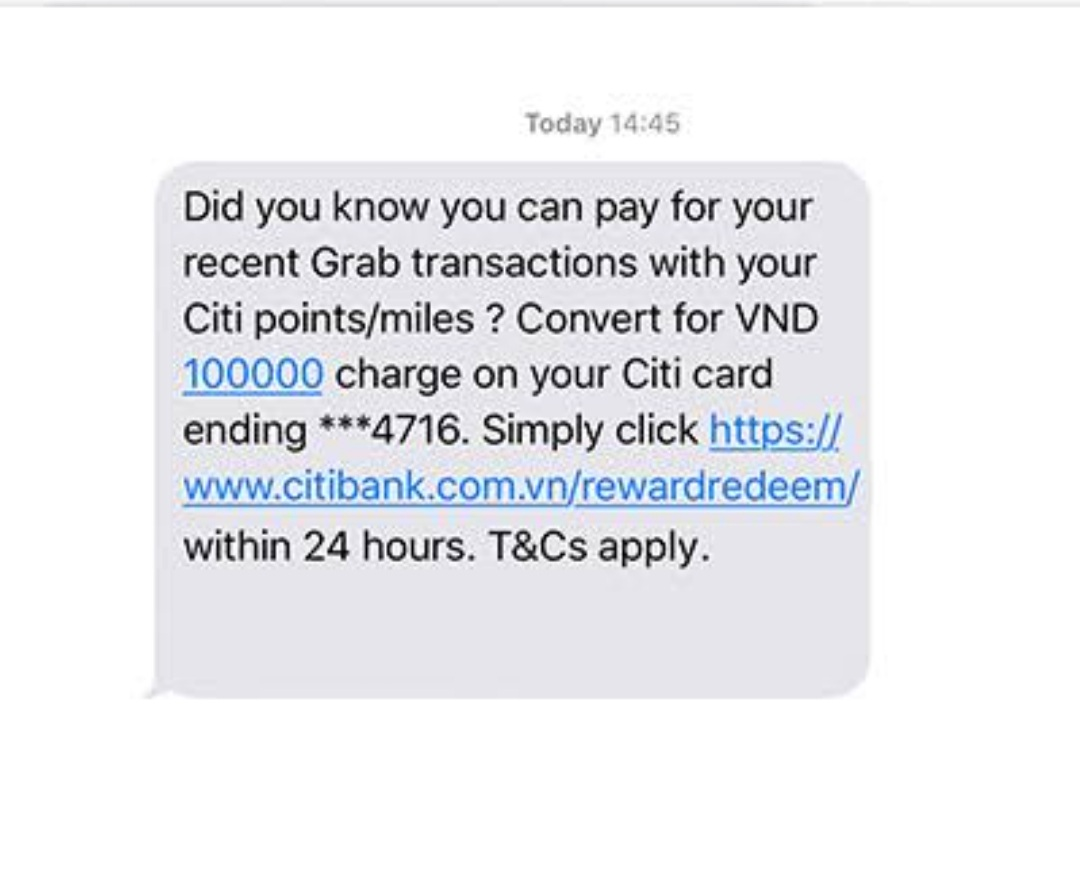

In [ ]:
image1

In [ ]:
print(pytesseract.image_to_string(image1, lang='eng'))

Today 14:45

Did you know you can pay for your
recent Grab transactions with your
Citi points/miles ? Convert for VND
100000 charge on your Citi card
ending ***4716. Simply click https://
www.citibank.com.vn/rewardredeem/
within 24 hours. T&Cs apply.

 



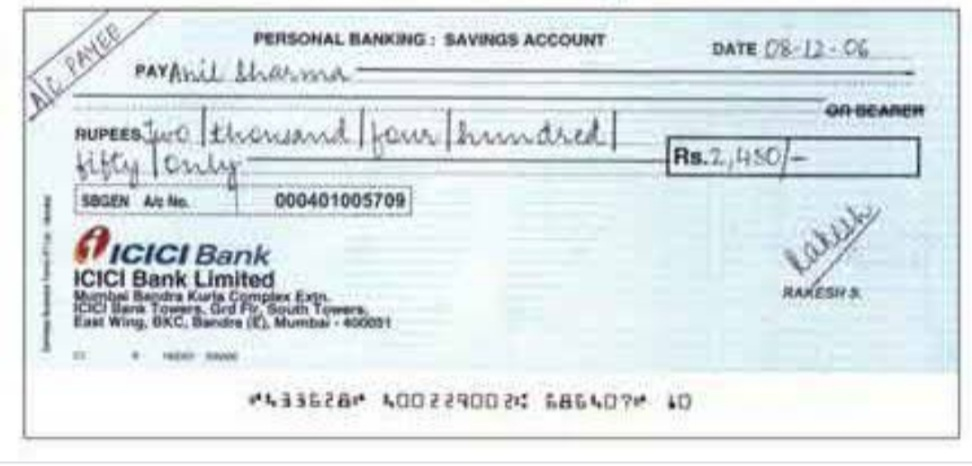

In [ ]:

image2 = Image.open('/content/drive/MyDrive/Colab Notebooks/Screenshot_20220425-083212_Chrome.jpg')
image2

# image21_file.save(image2, quality=95)

In [ ]:
print(pytesseract.image_to_string(image2, lang='eng'))

*RASE2H" KOOZ2Z900 2 BAGLOTE 40

 



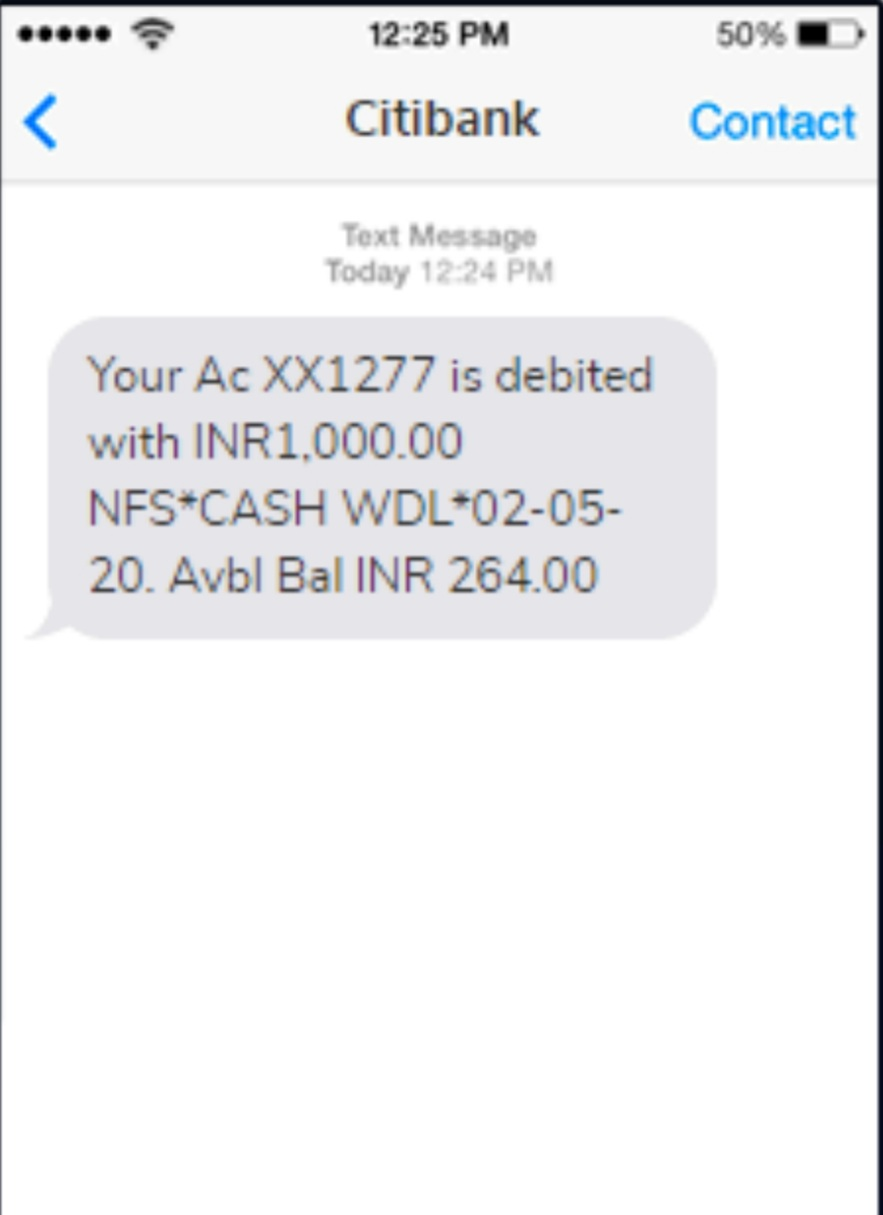

In [ ]:
image3 = Image.open('/content/drive/MyDrive/Colab Notebooks/Screenshot_20220425-083355_Chrome.jpg')
image3

In [ ]:
print(pytesseract.image_to_string(image3, lang='eng'))

 

sooce > 12:25 PM

< Citibank

Your Ac XX1277 is debited
with INR1,000.00
NFS*CASH WDL*02-05-
20. Avb! Bal INR 264.00

 

50% @>

Contact



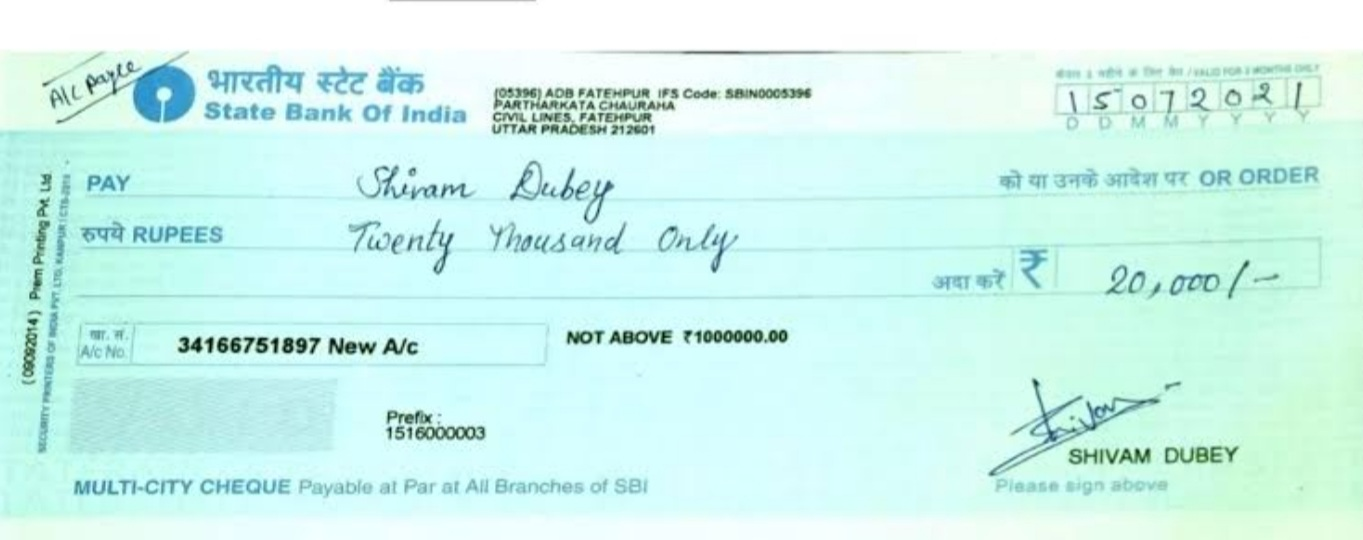

In [ ]:
image4 = Image.open('/content/drive/MyDrive/Colab Notebooks/bank_cheque1.jpg')
image4

In [ ]:
print(pytesseract.image_to_string(image4, lang='eng'))

De cn Rmpmpaese =e
Kiam Lube
waa RUPEES Tooenly Yhousand Only

 

 

wv] | 34166751897 New Alc NOT ABOVE 11000000.00

weno]

MULTI-CITY CHEQUE Payabie al Par at All Branches of SBI

omer) Pram Peiting Pt.
al

100 Hon 1 soe One

Vg] 208
st 7 37% Heat TT OR ORDER
wast © 20, 000/-

SHIVAM DUBEY

Please Bign above



In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [2]:
!git init

Initialized empty Git repository in /content/.git/


In [ ]:
!git clone https://github.com/reshamandi/reshamandi-aiml/OCR-Text extraction from image.git

# New section

In [ ]:
# !wget https://raw.githubusercontent.com/BigPin067/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

In [ ]:
# size = 7016, 4961
# im = Image.open('/content/drive/MyDrive/Colab Notebooks/Sample-image-of-a-bank-cheque.jpg')
# im_resized = im.resize(size, Image.ANTIALIAS)
# im_resized.save("my_image_resized.png", "PNG")